## 차원 축소

<p style="font-size:20px">차원의 저주<p>
<img src=https://blog.kakaocdn.net/dn/dSjYs2/btrEHCsBWO4/1KksRnbtemVcUwzpTLtIlK/img.png width=1000><br>
- 차원이 커질수록 데이터의 밀집도가 떨어지고, 포인트간 거리가 늘어남에 따라 희소화<br>
 -> 머신러닝 알고리즘 효율이 떨어진다
 
<p style="font-size:20px">차원 축소의 장점<p>
<img src=https://blog.kakaocdn.net/dn/cHZqyX/btrECw0MWGb/fimHPZRhnJfgD3cBi4Qq7k/img.png width=1000><br>
<br>
<img src=https://blog.kakaocdn.net/dn/VEIyi/btrFcifw0CA/6ncqZwvvSbLRxNcVPxa1y0/img.png width=1000><br>
<br>
- 데이터 크기 줄어서 학습 시간 감소
- 불필요한 피처 줄여서 모델 성능 향상에 기여할 가능성 있음.
- 다차원의 데이터를 3차원 이하로 줄여 시각적으로 데이터 패턴 확인 가능

**-> 핵심질문: 어떻게 하면 원본 데이터의 정보를 최대한으로 유지한 채로 차원 축소를 수행할수 있을까?**

<img src=https://blog.kakaocdn.net/dn/bHHXVp/btrEE0AZWHN/vCZ5jPUiJMOLCIZTC7DpjK/img.png width=1000><br>
1. 피처 선택: 데이터 특징을 잘 나타내는 주요 피처만 선택
2. 피처 추출: 기존 피처들을 압축해서 새로운 피처를 만드는 것
**-> 차원 축소에서 피처 추출을 더 많이 사용한다.**
피처 추출은 예를들어, 아래와 같은 피처들이 있을 때
모의고사 성정 30%, 종합 내신 성정 30%, 수능 성적 40%로 피처를 추출하고, 압축해서 학업 성취도라는 새로운 피처를 만드는 것이다.
<img src=https://blog.kakaocdn.net/dn/kGTWz/btrEDQrPHtt/fuWTGkC3SZ9rvBaqwgLZF1/img.png width=1000><br>
    
<img src=https://blog.kakaocdn.net/dn/NrZod/btrEH5VmPIp/H1ZCLfNv078W4uvzUKrcrk/img.png width=1000><br>
**차원 축소는 단순히 데이터 압축을 의미하는게 아니라, 좀 더 데이터를 잘 설명할 수 있는 잠재적(Latent)인 요소를 추출하는 것**<br>
활용분야) 추천 엔진, 이미지 분류, 문서 토픽 모델링 

## PCA 개요 
<br>

### PCA의 이해
<img src=https://blog.kakaocdn.net/dn/2hm0N/btrEGKd16bw/qiiKIYxiFWkmqHsyRYxIEK/img.png width=1000><br>

- **부분 공간으로 투영하는게 핵심**
- **PCA는 원본 데이터가 가지는 데이터 변동성을 가장 중요한 정보로 간주**<br>

<img src=https://blog.kakaocdn.net/dn/dL5GVO/btrEE1tLW7y/GgSt4xMsdV86EKZasm3kKk/img.png width=1000><br>

- PCA는 원본데이터의 피처들간에 상관관계가 있다고 가정하고, 압축을 수행.
- 원본 데이터의 변동성이 가장 큰 방향으로 축들을 생성하고, 그 축으로 데이터를 투영하는 방식
**변동성이 큰 방향: 데이터의 상관관계를 가장 잘 표현하는 회귀선의 방향** <br>


<p style="font-size:20px">공분산 행렬<p>
보통 분산은 한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동을 의미.<br>
예를들어, 사람 키(X), 몸무게(Y)에 대해 Cov(X,Y) > 0 이면 키(X)가 증가할 때, Y(몸무게)도 증가한다는 의미
<img src=https://blog.kakaocdn.net/dn/QRrBA/btrEGJTGWxA/VqZ49tEvbmscMlbcNzh6N0/img.png width=1000><br>

- 위 표에서 X행 X열 -> 그냥 X의 분산
- 공분산 행렬은 정방형행렬(행과 열의 개수가 같은 정사각형 모양) 이며, 대칭행렬(전치행렬과 스스로가 같은 행렬)

<img src=https://blog.kakaocdn.net/dn/OSHg7/btrEF8Gbbct/N7ljUk4KEF8OwKK4BVmK30/img.png width=1000><br>

### PCA 요약
<img src=https://blog.kakaocdn.net/dn/brJFKq/btrEJdsjEiM/tI2c7acHIxqH7r2226DgHk/img.png width=1000>

### 사이킷런 PCA

sklearn.decomposition.PCA<br>
<img src=https://blog.kakaocdn.net/dn/34xyd/btrEHVM2pqp/a6KaIdxSgBNi8rzwt9mnV1/img.png width=1000><br>
- n_components : PCA 축의 개수. 즉, 몇 차원으로 줄일건지

## PCA 실습

### 붓꽃 데이터로 PCA 변환

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


#### **sepal_length, sepal_width로 산포 시각화**

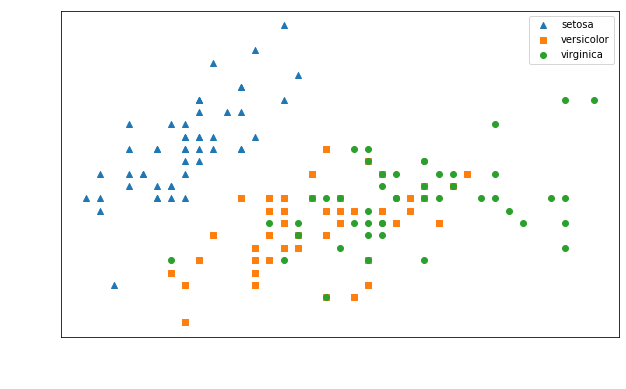

In [13]:
plt.rcParams['xtick.color'] = 'white';plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.color'] = 'white';plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.labelsize']= 20
plt.rcParams['figure.figsize'] = (10,6)
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o'] # ^:세모, s: square(네모), o:동그라미

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length'] # Series
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width'] # Series
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

#### **평균이 0, 분산이 1인 정규 분포로 변환**

In [14]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [16]:
# iris_scaled는 타겟값 빠져서 컬럼1개 차이
irisDF.shape, iris_scaled.shape # row개수는 같다.

((150, 5), (150, 4))

#### **PCA 변환 수행**

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2차원으로 차원축소

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape) # 컬럼이 2개 -> 2차원

(150, 2)


In [21]:
iris_pca[:3]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802]])

In [23]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target # 타겟값 넣기
irisDF_pca.head(3) # 출력

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


#### **PCA로 차원 축소된 피처들로 데이터 산포도 시각화**

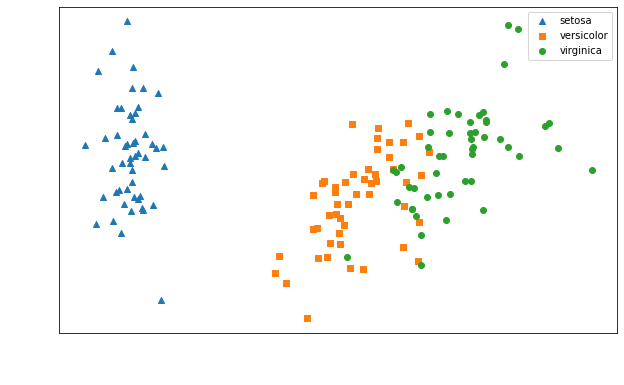

In [24]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()
# 원본 데이터에 비해 세토사는 x축을 기준으로 잘 분리되어있고,
# 버시콜라, 버지니카도 원본에 비해 잘 분류되어있다.

#### **각 PCA Component별 변동성 비율**

explained_variance_ratio_ 란?


In [8]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]


#### **원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교**
: 피처 4개에서 피처2개로 줄였는데 성능이 그렇게 크게 감소하지 않았다고도 볼 수 있다.<br>
상관도가 매우 큰 피처들이 많은 경우(차원의 저주), PCA를 잘 사용하면 성능이 감소되지 않고 PCA될 수 있다.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(f"원본 데이터 교차 검증 개별 정확도: {scores}")
print(f"원본 데이터 평균 정확도: {np.mean(scores):.2%}")

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 96.00%


In [26]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(f"PCA 변환 데이터 교차 검증 개별 정확도: {scores_pca}")
print(f"PCA 변환 데이터 평균 정확도: {np.mean(scores_pca):.2%}")

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 88.00%


### 신용카드 데이터 세트 PCA 변환

#### **데이터 로드 및 컬럼명 변환**
대만 고객의 채무불이행 사례를 대상으로 6가지 데이터 마이닝 방법 이용 -> 채무불이행 예측<br>
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [33]:
import pandas as pd
pd.set_option('display.max_columns',30)

# header=1 - 첫번째 row말고, 두번째 row를 헤더로 지정 -> 그 다음줄부터 data
# iloc[:,1:] - 첫번째 열 버리기 (ID)
df = pd.read_excel('pca_credit_card.xls', sheet_name='Data', header=1).iloc[:,1:]
print(df.shape)
display(df.head(1))

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1


In [34]:
# 컬럼 이름 수정
## default payment next month : 타겟값 -> default로 변경
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
# ID, default 컬럼 Drop
X_features = df.drop(['default'], axis=1)

In [49]:
print(y_target.value_counts()) # 0 - 채무 이행, 1 - 채무 불이행
print(f"\n0과 1의 비율\n{y_target.value_counts() / y_target.shape[0]}")

0    23364
1     6636
Name: default, dtype: int64

0과 1의 비율
0    0.7788
1    0.2212
Name: default, dtype: float64


In [14]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(23)
memory usage: 5.3 MB


#### **피처간 상관도 시각화**

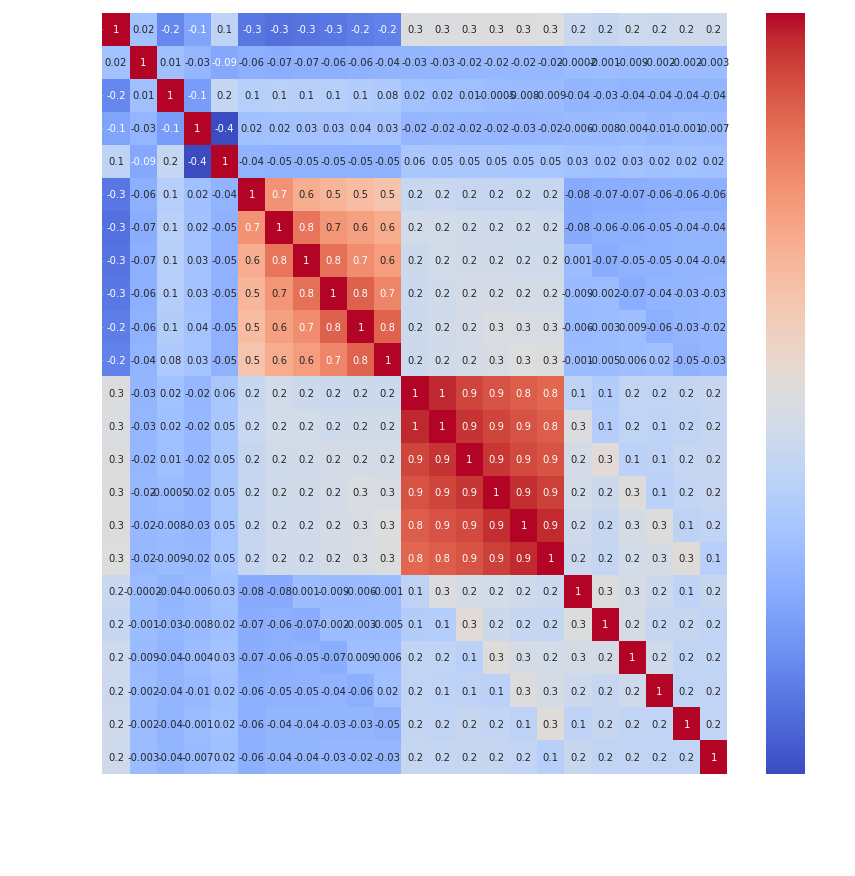

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g', cmap='coolwarm')
plt.show()

#### **상관도가 높은 피처들의 PCA 변환 후 변동성 확인**
- 상관도가 매우 높은 BILL_AMT1 ~ BILL_AMT6까지 6개 피처를 2개로 차원 축소

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
# fit만 해도, explained_variance_ratio_ 확인 가능
print('PCA Component별 변동성:', pca.explained_variance_ratio_)
print(f"2개의 피처만으로 {sum(pca.explained_variance_ratio_):.2%}의 변동성을 잡아낼 수 있다")

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]
2개의 피처만으로 95.65%의 변동성을 잡아낼 수 있다


#### **원본 데이터와 PCA 변환된 데이터 성능 비교**

**원본 데이터 세트**

In [68]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print(f"원본 데이터 세트: {X_features.shape[1]}개의 피처")
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
원본 데이터 세트: 23개의 피처
평균 정확도:0.8170


**6개 컴포넌트로 PCA 변환된 데이터 세트**

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 -> 6개 피처 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7912 0.7966 0.8032]
PCA 변환 -> 6개 피처 데이터 셋 평균 정확도:0.7970


- 23개 피처에서 6개로 피처가 줄었는데도 불구하고 성능은 81.7%에서 79.7%로 2% 정도만 낮아졌다.